In [3]:
!git clone https://github.com/ritusingla/deep-image-prior
!mv deep-image-prior/* ./

Cloning into 'deep-image-prior'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 567 (delta 82), reused 155 (delta 43), pack-reused 308
Receiving objects: 100% (567/567), 301.24 MiB | 16.49 MiB/s, done.
Resolving deltas: 100% (245/245), done.


# Import libs

In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os

import numpy as np
from models import *

import torch
import torch.optim

from skimage.measure import compare_psnr
from utils.denoising_utils import *

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True
sigma = 25
sigma_ = sigma/255.

In [0]:
fname = 'data/denoising/F16_GT.png'

# Load image

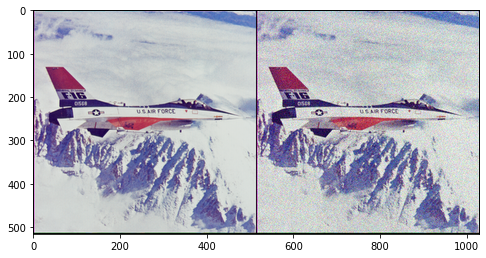

In [6]:
# Add synthetic noise
img_pil = crop_image(get_image(fname, imsize)[0], d=32)
img_np = pil_to_np(img_pil)
    
img_noisy_pil, img_noisy_np = get_noisy_image(img_np, sigma_)
    
if PLOT:
  plot_image_grid([img_np, img_noisy_np], 10, 6);
else:
  assert False

# Setup

In [7]:
INPUT = 'noise' # 'meshgrid'
pad = 'reflection'
OPT_OVER = 'net' # 'net,input'

reg_noise_std = 1./30. # set to 1./20. for sigma=50
LR = 0.01

OPTIMIZER='adam' # 'LBFGS'
show_every = 100
exp_weight=0.99

num_iter = 3000
input_depth = 32 
figsize = 4 
    
    
net = get_net(input_depth, 'skip', pad,
                  skip_n33d=128, 
                  skip_n33u=128, 
                  skip_n11=4, 
                  num_scales=5,
                  upsample_mode='bilinear').type(dtype)
    
net_input = get_noise(input_depth, INPUT, (img_pil.size[1], img_pil.size[0])).type(dtype).detach()

# Compute number of parameters
s  = sum([np.prod(list(p.size())) for p in net.parameters()]); 
print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_noisy_torch = np_to_torch(img_noisy_np).type(dtype)

Number of params: 2217831


# Optimize

Starting optimization with ADAM


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_

Iteration 00000    Loss 0.089717   PSNR_noisy: 10.471273   PSRN_gt: 10.904884 PSNR_gt_sm: 10.904884

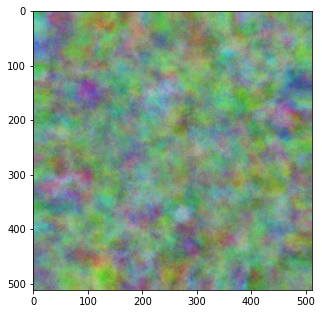

Iteration 00100    Loss 0.016917   PSNR_noisy: 17.716760   PSRN_gt: 21.056215 PSNR_gt_sm: 16.862271

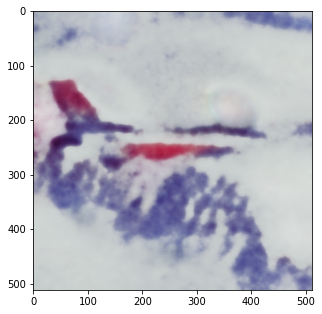

Iteration 00200    Loss 0.014667   PSNR_noisy: 18.336592   PSRN_gt: 22.527918 PSNR_gt_sm: 21.101079

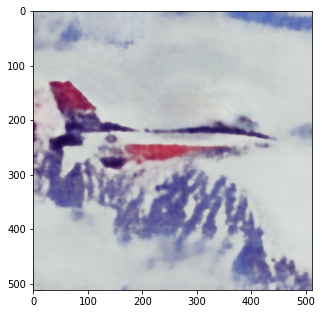

Iteration 00300    Loss 0.013211   PSNR_noisy: 18.790721   PSRN_gt: 23.840624 PSNR_gt_sm: 23.489872

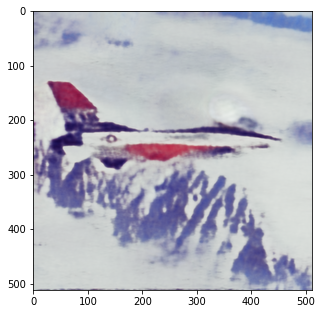

Iteration 00400    Loss 0.012285   PSNR_noisy: 19.106332   PSRN_gt: 24.937501 PSNR_gt_sm: 25.016789

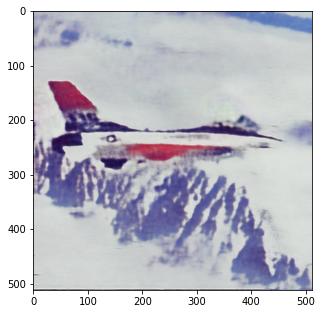

Iteration 00500    Loss 0.011826   PSNR_noisy: 19.271801   PSRN_gt: 25.551829 PSNR_gt_sm: 26.093449

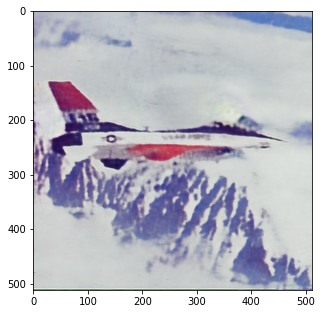

Iteration 00600    Loss 0.011450   PSNR_noisy: 19.411810   PSRN_gt: 26.183120 PSNR_gt_sm: 26.909580

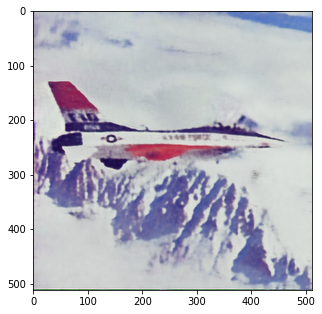

Iteration 00700    Loss 0.011091   PSNR_noisy: 19.550317   PSRN_gt: 26.839782 PSNR_gt_sm: 27.605469

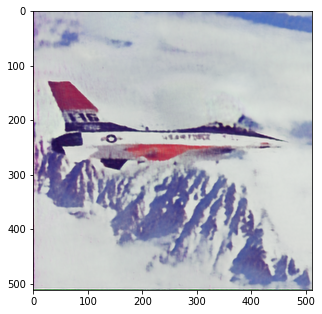

Iteration 00800    Loss 0.010838   PSNR_noisy: 19.650703   PSRN_gt: 27.409719 PSNR_gt_sm: 28.583312

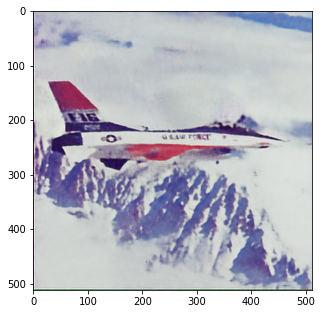

Iteration 00900    Loss 0.010592   PSNR_noisy: 19.750217   PSRN_gt: 28.032489 PSNR_gt_sm: 29.272770

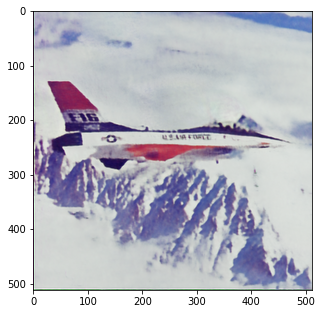

Iteration 01000    Loss 0.010438   PSNR_noisy: 19.813925   PSRN_gt: 28.416881 PSNR_gt_sm: 29.774633

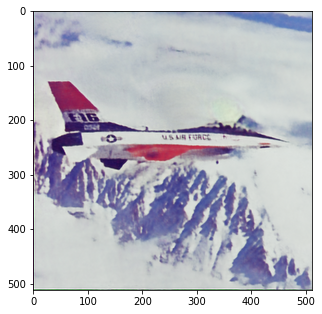

Iteration 01100    Loss 0.010321   PSNR_noisy: 19.862869   PSRN_gt: 28.677861 PSNR_gt_sm: 30.201285

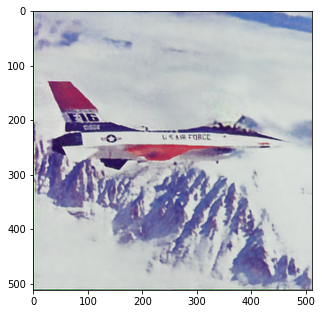

Iteration 01200    Loss 0.010191   PSNR_noisy: 19.917821   PSRN_gt: 29.101047 PSNR_gt_sm: 30.580927

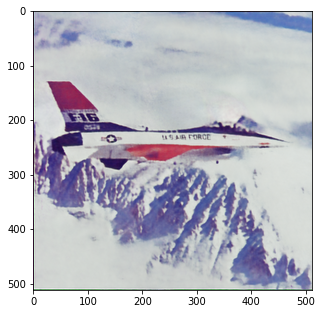

Iteration 01300    Loss 0.010097   PSNR_noisy: 19.958039   PSRN_gt: 29.286140 PSNR_gt_sm: 30.932690

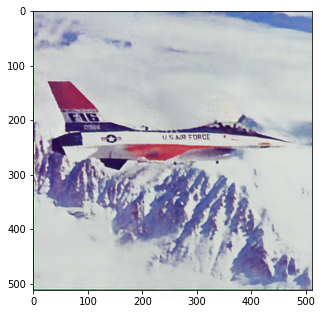

Iteration 01400    Loss 0.010027   PSNR_noisy: 19.988156   PSRN_gt: 29.487392 PSNR_gt_sm: 31.250143

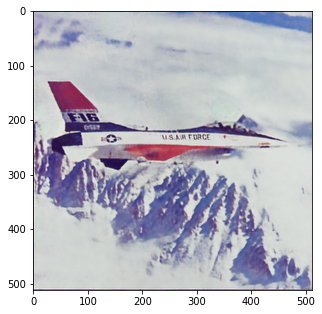

Iteration 01500    Loss 0.009937   PSNR_noisy: 20.027598   PSRN_gt: 29.797411 PSNR_gt_sm: 31.526363

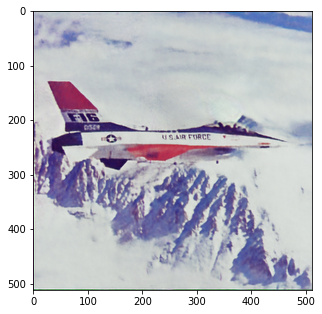

Iteration 01600    Loss 0.009904   PSNR_noisy: 20.041894   PSRN_gt: 29.776590 PSNR_gt_sm: 31.753242

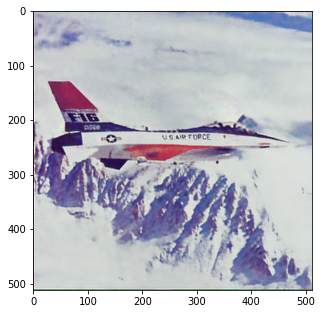

Iteration 01700    Loss 0.009782   PSNR_noisy: 20.095766   PSRN_gt: 30.173893 PSNR_gt_sm: 31.943804

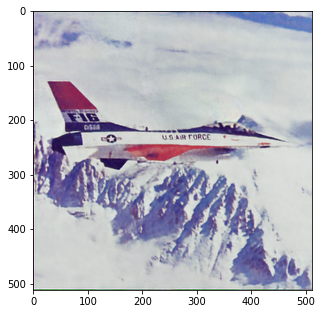

Iteration 01800    Loss 0.009740   PSNR_noisy: 20.114473   PSRN_gt: 30.280756 PSNR_gt_sm: 32.114900

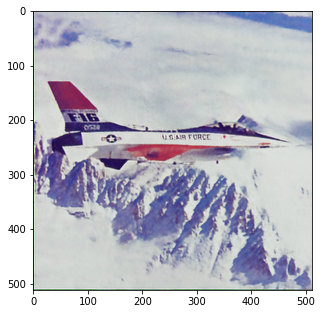

Iteration 01900    Loss 0.009721   PSNR_noisy: 20.123021   PSRN_gt: 30.117559 PSNR_gt_sm: 32.258312

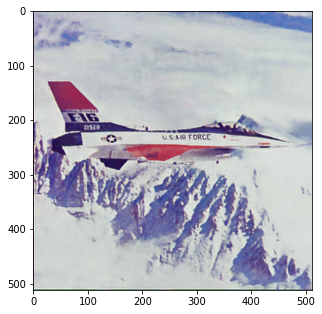

Iteration 02000    Loss 0.009643   PSNR_noisy: 20.157679   PSRN_gt: 30.328693 PSNR_gt_sm: 32.372862

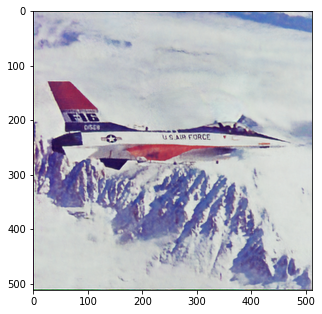

Iteration 02100    Loss 0.009602   PSNR_noisy: 20.176168   PSRN_gt: 30.401353 PSNR_gt_sm: 32.467688

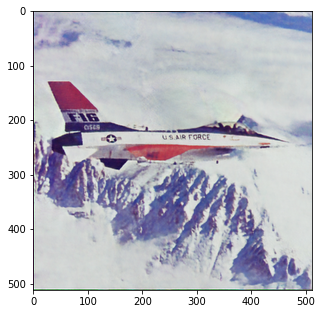

Iteration 02200    Loss 0.009547   PSNR_noisy: 20.201539   PSRN_gt: 30.479082 PSNR_gt_sm: 32.544222

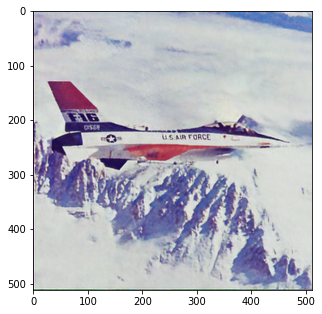

Iteration 02300    Loss 0.009469   PSNR_noisy: 20.236880   PSRN_gt: 30.626027 PSNR_gt_sm: 32.597293

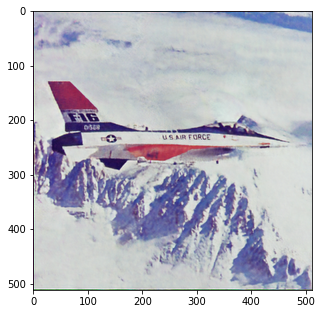

Iteration 02400    Loss 0.009426   PSNR_noisy: 20.256875   PSRN_gt: 30.636099 PSNR_gt_sm: 32.620872

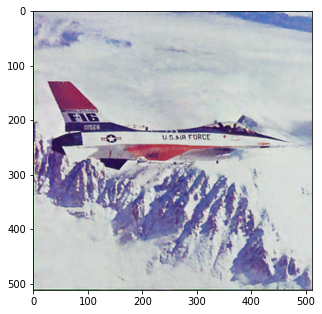

Iteration 02500    Loss 0.009397   PSNR_noisy: 20.270333   PSRN_gt: 30.461721 PSNR_gt_sm: 32.632774

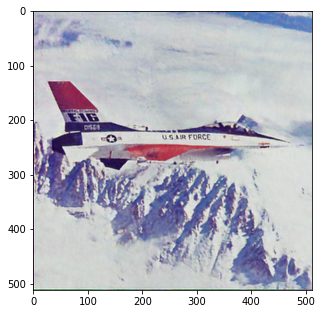

Iteration 02600    Loss 0.009319   PSNR_noisy: 20.306454   PSRN_gt: 30.608652 PSNR_gt_sm: 32.629497

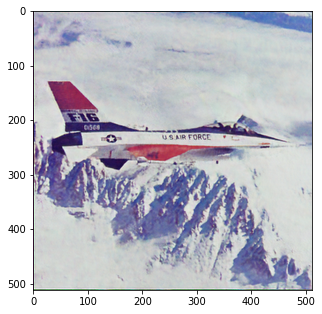

Iteration 02700    Loss 0.009302   PSNR_noisy: 20.314246   PSRN_gt: 30.447113 PSNR_gt_sm: 32.599993

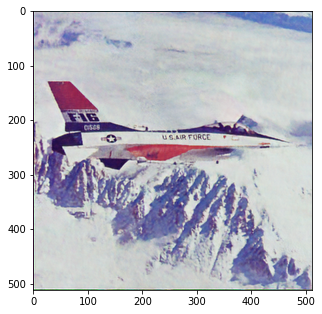

Iteration 02800    Loss 0.009240   PSNR_noisy: 20.343179   PSRN_gt: 30.499849 PSNR_gt_sm: 32.554069

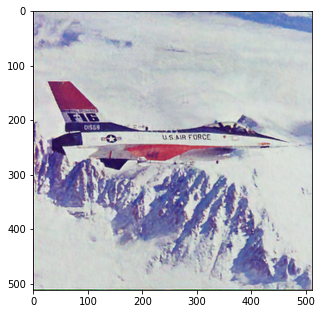

Iteration 02900    Loss 0.009185   PSNR_noisy: 20.369342   PSRN_gt: 30.460739 PSNR_gt_sm: 32.491364

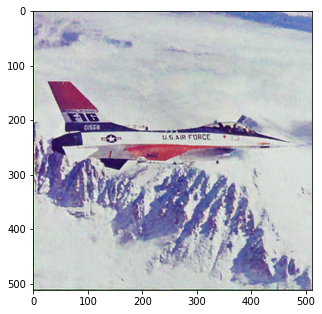

In [8]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
out_avg = None
last_net = None
psrn_noisy_last = 0
loss=[]
p_n=[]
p_gt=[]
p_gt_sm=[]
acc=[]
i = 0
def closure():
    
    global i, out_avg, psrn_noisy_last, last_net, net_input,loss,p_n,p_gt,p_gt_sm,acc
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
    
    # Smoothing
    if out_avg is None:
        out_avg = out.detach()
    else:
        out_avg = out_avg * exp_weight + out.detach() * (1 - exp_weight)
            
    total_loss = mse(out, img_noisy_torch)
    total_loss.backward()
    loss=np.append(loss,total_loss.item())
    l=total_loss.item()
    a= 100-(l*1000)
    acc= np.append(acc,a)
    psrn_noisy = compare_psnr(img_noisy_np, out.detach().cpu().numpy()[0]) 
    psrn_gt    = compare_psnr(img_np, out.detach().cpu().numpy()[0]) 
    psrn_gt_sm = compare_psnr(img_np, out_avg.detach().cpu().numpy()[0]) 
    p_n=np.append(p_n,psrn_noisy)
    p_gt=np.append(p_gt,psrn_noisy)
    p_gt_sm=np.append(p_gt_sm,psrn_gt_sm)
    
    # Note that we do not have GT for the "snail" example
    # So 'PSRN_gt', 'PSNR_gt_sm' make no sense
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        print ('Iteration %05d    Loss %f   PSNR_noisy: %f   PSRN_gt: %f PSNR_gt_sm: %f' % (i, total_loss.item(), psrn_noisy, psrn_gt, psrn_gt_sm), sep='\r', end='')
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
        
        
    
    # Backtracking
    if i % show_every:
        if psrn_noisy - psrn_noisy_last < -5: 
            print('Falling back to previous checkpoint.')

            for new_param, net_param in zip(last_net, net.parameters()):
                net_param.data.copy_(new_param.cuda())

            return total_loss*0
        else:
            last_net = [x.detach().cpu() for x in net.parameters()]
            psrn_noisy_last = psrn_noisy
            
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

In [9]:
out_np = torch_to_np(net(net_input))



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [10]:
print("1st:  Image From Deep Image Prior     2nd: Noisy Image   3rd: Original Image")

1st:  Image From Deep Image Prior     2nd: Noisy Image   3rd: Original Image


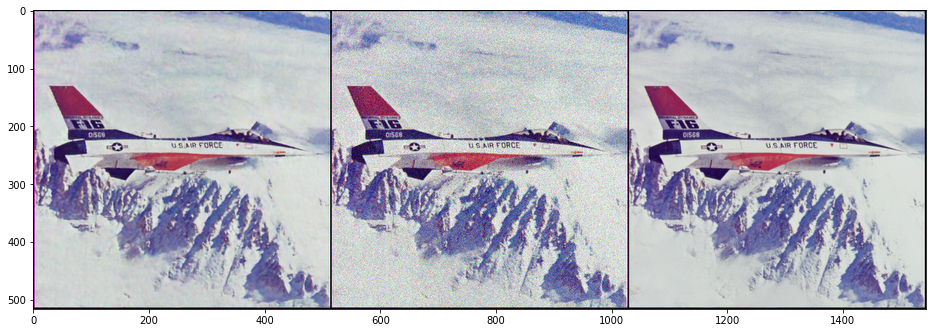

In [11]:
q = plot_image_grid([np.clip(out_np, 0, 1),img_noisy_np, img_np], factor=13);

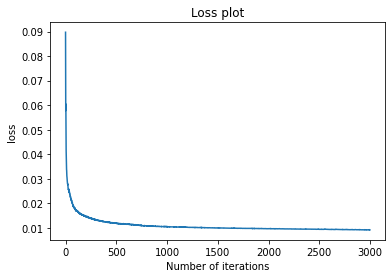

In [12]:
plt.title('Loss plot')
plt.xlabel('Number of iterations')
plt.ylabel('loss')
plt.plot(loss)
plt.show()


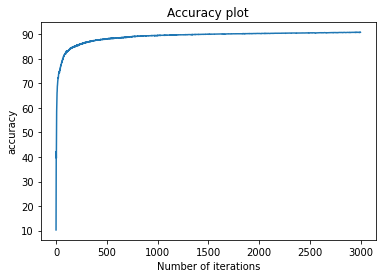

In [13]:
plt.xlabel('Number of iterations')
plt.ylabel('accuracy')
plt.title('Accuracy plot')
plt.plot(acc)
plt.show()


### **Detail Color Enhancement**

In [14]:

!apt install caffe-cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  caffe-tools-cuda cython3 fonts-lyx javascript-common libblosc1
  libcaffe-cuda1 libcublas9.1 libcudart9.1 libcurand9.1 libgflags2.2
  libgoogle-glog0v5 libjs-jquery libjs-jquery-ui libleveldb1v5 liblmdb0
  python-matplotlib-data python-tables-data python3-bs4 python3-caffe-cuda
  python3-chardet python3-cycler python3-dateutil python3-decorator
  python3-gflags python3-h5py python3-html5lib python3-ipython
  python3-ipython-genutils python3-leveldb python3-lxml python3-matplotlib
  python3-networkx python3-nose python3-numexpr python3-olefile python3-pandas
  python3-pandas-lib python3-pexpect python3-pickleshare python3-pil
  python3-pkg-resources python3-prompt-toolkit python3-protobuf
  python3-ptyprocess python3-pygments python3-pyparsing python3-pywt
  python3-scipy python3-simplegeneric python3-six python3-skimage
  python3-skimage

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import caffe
import os
import skimage.color as color
import scipy.ndimage.interpolation as sni

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [16]:
!wget -O models/colorization_release_v1.caffemodel http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel

--2020-06-01 06:41:58--  http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving eecs.berkeley.edu (eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1
Connecting to eecs.berkeley.edu (eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel [following]
--2020-06-01 06:41:58--  https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128948189 (123M)
Saving to: ‘models/colorization_release_v1.caffemodel’

models/colorization 100%[===================

In [0]:
gpu_id = 0
caffe.set_mode_gpu()
caffe.set_device(gpu_id)
net = caffe.Net('models/colorization_deploy_v1.prototxt', 'models/colorization_release_v1.caffemodel', caffe.TEST)

(H_in,W_in) = net.blobs['data_l'].data.shape[2:] # get input shape
(H_out,W_out) = net.blobs['class8_ab'].data.shape[2:] # get output shape
net.blobs['Trecip'].data[...] = 6/np.log(10) # 1/T, set annealing temperature
    # (We found that we had introduced a factor of log(10). We will update the arXiv shortly.)

Image to be colorise


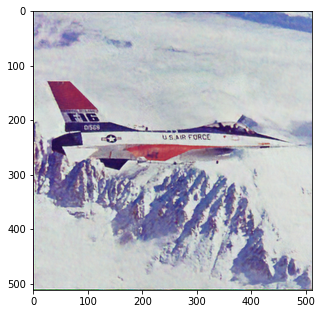

In [18]:
print("Image to be colorise")
plot_image_grid([out_np], factor=4, nrow=1);
plt.show()

In [0]:
net.forward() # run network

out = net.blobs['class8_ab'].data[0,:,:,:].transpose((1,2,0)) # this is our result
norm=0.07

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1st: original image   2nd: noisy image  3rd: clolorised image  4th: image obtaind from Deep Image Prior


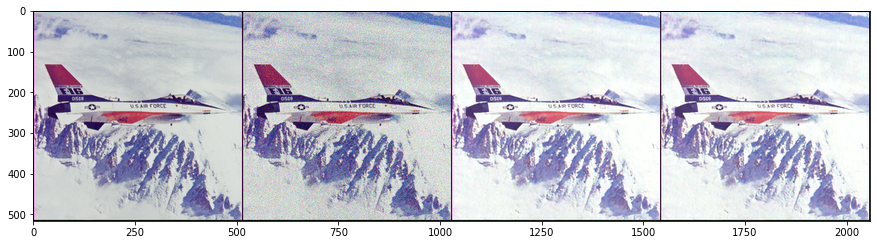

In [22]:
out= out_np
out_np+=norm
print("1st: original image   2nd: noisy image  3rd: clolorised image  4th: image obtaind from Deep Image Prior")
plot_image_grid([img_np, img_noisy_np, np.clip(out_np, 0, 1),out],factor=11, nrow=4);
plt.show()